In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
df['label']

0        1
2        1
3        0
4        1
5        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 71537, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

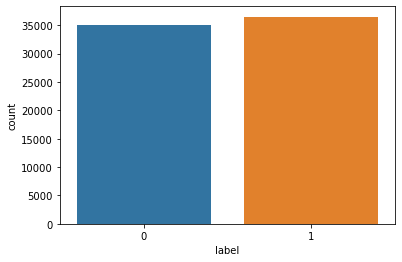

In [9]:
sns.countplot(data=df, x='label')

In [10]:
df['title']

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
5        About Time! Christian Group Sues Amazon and SP...
                               ...                        
72129    Russians steal research on Trump in hack of U....
72130     WATCH: Giuliani Demands That Democrats Apolog...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: title, Length: 71537, dtype: object

In [11]:
df['title'].value_counts()

Factbox: Trump fills top jobs for his administration                                                  14
Factbox: Contenders for senior jobs in Trump's administration                                          8
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence     8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                       8
The Dark Agenda Behind Globalism And Open Borders                                                      7
                                                                                                      ..
Trump speaks to Qatar emir on Gulf unity, terrorism fight: White House                                 1
 Eric Trump: Hispanics ‘Can’t Wait’ For My Dad To Win The Election (AUDIO)                             1
Population of Vertebrate Animals Fell 58% From 1970-2012                                               1
Italy's Renzi pledges to hike budget deficit if he wins

In [12]:
df['text']

0        No comment is expected from Barack Obama Membe...
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
5        All we can say on this one is it s about time ...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: text, Length: 71537, dtype: object

In [13]:
# my_text = ''

In [14]:
# for idx, text in enumerate(df['text']):
    
#     clean_text = re.sub('[^A-Za-z ]', '', text)
#     clean_text = clean_text.lower()
#     my_text = my_text + clean_text

In [15]:
from wordcloud import WordCloud

In [16]:
# wc = WordCloud(background_color='white', max_words=200).generate(my_text)
# plt.figure(figsize=(20, 10))
# plt.imshow(wc, interpolation='bilinear')
# plt.show()

In [17]:
# my_text

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
X = df['text']

In [20]:
y = df['label']

In [21]:
cv = CountVectorizer()

In [22]:
cv.fit(X)

CountVectorizer()

In [23]:
features = cv.transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=55)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree = DecisionTreeClassifier()

In [27]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
pred = tree.predict(X_test)

In [29]:
pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [31]:
confusion_matrix(y_test, pred)

array([[ 9670,   907],
       [  649, 10236]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


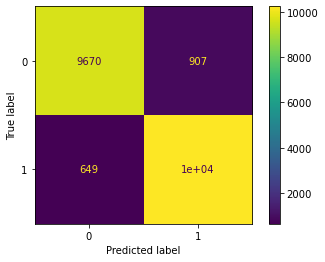

In [32]:
plot_confusion_matrix(estimator=tree, X=X_test, y_true=y_test)

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10577
           1       0.92      0.94      0.93     10885

    accuracy                           0.93     21462
   macro avg       0.93      0.93      0.93     21462
weighted avg       0.93      0.93      0.93     21462



In [34]:
q = ['Did they post their votes for Hillary already?']

In [35]:
q = cv.transform(q)

In [36]:
q

<1x243189 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [37]:
p = tree.predict(q)

In [38]:
p

array([1], dtype=int64)

In [39]:
q = ["BAGHDAD/LONDON (Reuters) - When the Iraqi army and Iranian-backed Shi ite militia entered a key oil processing facility in Iraq s north to retake it from Kurdish Peshmerga forces last week, the installation was deserted and its alarm bells ringing. Engineers and workers on the facility, which processes oil from two major fields in the Kirkuk area of predominantly Sunni Kurdistan, had fled, fearing the military advance.  No one wanted to risk their life and decided to evacuate as stories about the Shi ite militia and Qassem Soleimani were spreading fast,  said a senior Kurdish oil industry source, referring to the head of foreign operations for Iran s elite Revolutionary Guards. The source declined to be identified. Iraqi engineers arrived to the sound of alarm bells warning about system malfunctions, prompting them to immediately shut down wells. Now, they need passwords and expertise from their Kurdish counterparts to restore oil output fully.  The loss of control of Kirkuk oil fields is likely to starve the KRG of vital oil revenue and cause deep concern to global trading houses such as Vitol and Glencore, which have granted the semi-autonomous government billions of dollars in loans against future oil sales. Baghdad s lightning military offensive into northern Iraq came after the Kurdistan Regional Government held an independence referendum last month. Major-General Soleimani, one of the most influential military figures in the Middle East, with reach in Syria and Lebanon, issued tough warnings to Kurdish leaders ahead of the Iraqi military advance.  We went inside the oilfield facilities after Kurdish workers fled and we found overalls and safety boots thrown on the ground,  said an engineer from the Baghdad-run North Oil Company, who declined to be named because he was ordered not to speak publicly about the issue.   It seems that workers took them off and escaped very quickly.   NOC crews entered oil facilities in the Bai Hassan and Avana fields on Oct. 17 for the first time since 2014, when Peshmerga forces drove Islamic State from the area and found all crude oil stations unmanned. Peshmerga fighters had also withdrawn.  After we discovered that some of the key equipment was missing and the control panel was ringing alarms of crude processing malfunction, we immediately shut down oil wells,  the NOC engineer said. A week after the operation, Iraqi engineers are still struggling to resume Kirkuk s oil production, saying they had yet to understand how to operate the equipment processing some 350,000 barrels per day. The military offensive more than halved Kurdistan s oil output and cut its exports to global markets via Turkey by two thirds.  The drop in exports has deprived the region of more than $200 million in revenues over the past week, a Kurdish oil industry source familiar with loadings told Reuters. It has also dealt a further blow to the region s finances already stretched by a fight against Islamic State and a budget crisis caused by a fall in oil prices. The United States has called on both sides to resume dialogue, saying the tensions hamper efforts to fight Islamic State. Resuming normal oil production and exports will be challenging and will take at least another week and will only succeed if Iraqi and Kurdish engineers agree to cooperate, according to both sides. On Tuesday, NOC officials asked Kurdish engineering firm Kar Group to send back its workers, according to sources on both sides. Iraqi engineers need guidance on how to operate recently installed equipment at Bai Hassan and Avana, the sources said. The pumping and operational stations for both oil fields are located in the city of Dahuk, which unlike Kirkuk is still under the control of the Peshmerga forces.  Energy facilities in Kirkuk are more like a locked box and only their crew have the password,  the Iraqi engineer said. Kar Group has, however, so far refrained from going back without security guarantees, according to sources close to the engineering company. Kirkuk, one of the oldest and best known oil areas in the Middle East, had long been under the control of Iraqi forces until it was over-run by Islamic State. In 2014, it was retaken by the Peshmerga, the official security forces of the KRG, as part of their advance on Islamic State. That allowed Kurdistan to regain control of an area it believes is historically Kurdish and ramp up exports from the oil fields while borrowing billions of dollars from trading houses and Russian state oil major Rosneft.  We need to figure out who gets what when the fields resume production. At the moment the potential split of revenues is far from clear,  said the Kurdish oil industry source. Before the referendum, Kurdistan was exporting some 600,000 bpd of crude via Turkey, which it said had made it almost totally economically independent as it could pay its own bills without the need to wait for budget transfers from Baghdad. Under the deal with Baghdad, Kurdistan was exporting 540,000 bpd on behalf of the government in the city of Erbil and some 60,000 bpd on behalf of NOC. With the loss of control of the Kirkuk area, Kurdistan will be in theory left with only 250,000-300,000 bpd of its own output, less than it needs to cover its debt obligations. Vitol, Glencore, Petraco and Trafigura have loaned Kurdistan some $2.5 billion and Russia s Rosneft has loaned some $1.2 billion. Glencore s boss Ivan Glasenberg said last week he could not rule out a rescheduling of the payments"]

In [40]:
q = cv.transform(q)

In [41]:
p = tree.predict(q)

In [42]:
p

array([0], dtype=int64)